### Credit Card Fraud Detection Model using Pytorch

#### EDA
Quick look at data. Very brief however notebook goal focusing on using/implementing pytorch, not eda

In [12]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /Users/fraserbytheway/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
['creditcard.csv']


In [13]:
import pandas as pd
import torch
from torch import nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


df = pd.read_csv(f'{path}/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


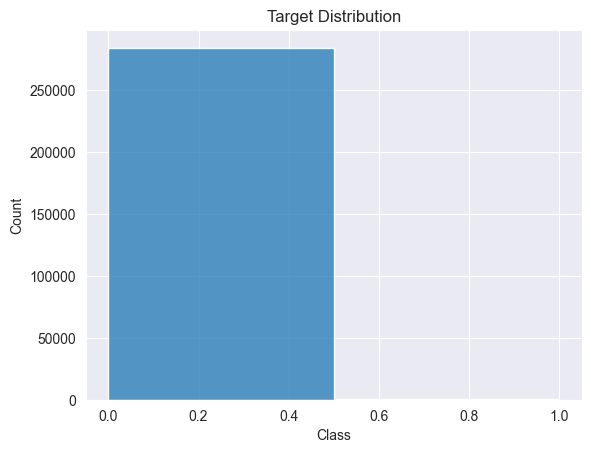

In [15]:
sns.histplot(data = df, x = 'Class', stat = 'count', bins = 2)
plt.title('Target Distribution')
plt.show()

In [16]:
print(df['Class'].sum(), df['Class'].shape)
imbalance = df['Class'].sum()/df['Class'].size
print(imbalance)

492 (284807,)
0.001727485630620034


Very large class imbalance. To solve, will oversample training data. Alternate solutions include using a weighted loss function in the nn model

#### Oversampling for imbalanced classes
retrying model, however training with balanced classes to boost precision

Data scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from torch.utils.data import TensorDataset, DataLoader
ros = RandomOverSampler(random_state=0)

X = df.drop('Class', axis=1).values
y = df['Class'].values.astype(np.int64)  # ints {0,1}

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
xtest, xvalidate, ytest, yvalidate = train_test_split(xtest, ytest, test_size=0.4, random_state=42, stratify=ytest)

# Scaling x input data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(xtrain).astype('float32')
X_val_scaled   = scaler.transform(xvalidate).astype('float32')
X_test_scaled  = scaler.transform(xtest).astype('float32')

# Oversampling input classes for better true representation
# leaving test and validate classes unchanged
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, ytrain)

X_train_bal = X_train_bal.astype('float32')
y_train_bal = y_train_bal.astype('float32')

x_data = [X_train_bal, X_val_scaled, X_test_scaled]
y_data = [y_train_bal, ytest, yvalidate]

for data in y_data:
    print((data == 1).sum(), (data == 0).sum())

170589 170589
118 68235
79 45491


Torch Preparation

In [18]:
device = 'cpu'

X_train_t = torch.from_numpy(X_train_bal)
y_train_t = torch.from_numpy(y_train_bal)


X_val_t = torch.from_numpy(X_val_scaled)
y_val_t = torch.from_numpy(yvalidate.astype('float32'))

X_test_t = torch.from_numpy(X_test_scaled)
y_test_t = torch.from_numpy(ytest.astype('float32'))


train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t, y_val_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

#### Pytorch Model 1

##### Model Definition

In [19]:
import torch
from torch import nn

# first simple neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(30, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        prob = self.linear_relu_stack(x).squeeze(-1)
        return prob

##### Helper functions

In [20]:
def train_loop(model, loader, criterion, optimizer):
    model.train()
    total, n = 0.0, 0
    for Xb, yb in loader:
        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total += loss.item() * Xb.size(0)
        n += Xb.size(0)

    return total / max(1, n)


@torch.no_grad()
def test_loop(model, loader, criterion):
    model.eval()
    total, n, correct = 0.0, 0, 0
    for Xb, yb in loader:
        logits = model(Xb)
        loss = criterion(logits, yb)
        total += loss.item() * Xb.size(0)
        n += Xb.size(0)

        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        correct += (preds == yb).sum().item()

    avg_loss = total / n
    acc = correct / n
    print(f"Test: acc={100 * acc:0.2f}%, loss={avg_loss:.6f}")
    return avg_loss, acc

def validate(model, xvalidate, threshold=0.5):
    model.eval()
    device = next(model.parameters()).device
    with torch.no_grad():
        X = xvalidate.float().to(device)
        logits = model(X)
        probs = torch.sigmoid(logits)
        preds = (probs >= threshold).float()
    return preds.cpu().numpy().tolist()

#### Testing model with new input data

evaluating model - trained with bias classes

In [21]:
model = NeuralNetwork().to(device)
print(model)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

for epoch in range(1, 51):
    tr_loss = train_loop(model, train_loader, criterion, optimizer)
    print(f"Epoch {epoch} | train_loss={tr_loss:.6f}")
    test_loop(model, test_loader, criterion)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)
Epoch 1 | train_loss=0.692642
Test: acc=99.55%, loss=0.686274
Epoch 2 | train_loss=0.687476
Test: acc=99.87%, loss=0.673807
Epoch 3 | train_loss=0.682619
Test: acc=99.87%, loss=0.664163
Epoch 4 | train_loss=0.677046
Test: acc=99.87%, loss=0.653629
Epoch 5 | train_loss=0.669526
Test: acc=99.87%, loss=0.640415
Epoch 6 | train_loss=0.658994
Test: acc=99.88%, loss=0.621860
Epoch 7 | train_loss=0.644890
Test: acc=99.88%, loss=0.596413
Epoch 8 | train_loss=0.625830
Test: acc=99.88%, loss=0.566494
Epoch 9 | train_loss=0.600446
Test: acc=99.89%, loss=0.534174
Epoch 10 | train_loss=0.567799
Test: acc=99.90%, loss=0.500698
Epoch 11 | train_loss=0.528144
Test: acc=99.91%, loss=0.455684
Epo

Sensitivity: 0.9241, Precision: 0.0873


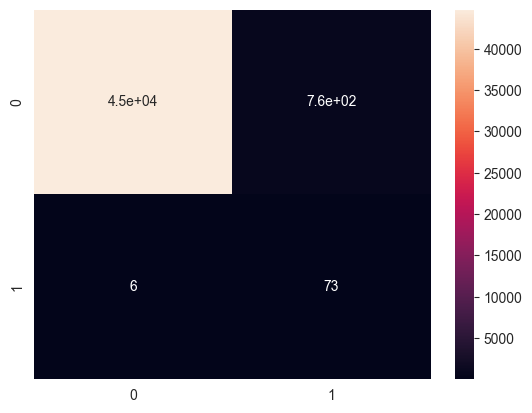

In [22]:
from sklearn.metrics import confusion_matrix

results = validate(model, X_val_t)

cm = confusion_matrix(y_val_t, results)
sns.heatmap(cm, annot=True)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])

print(f'Sensitivity: {sensitivity:.4f}, Precision: {precision:.4f}')

#### Model optimisation

Finding optimal threshold for classification

##### Decision threshold

Finding best decision threshold for predictions. An extension of this idea could be using bagging to help classify samples with reduced probability

Best threshold (by precision): 0.9990, precision=0.8101, recall=0.5423728813559322


<Axes: >

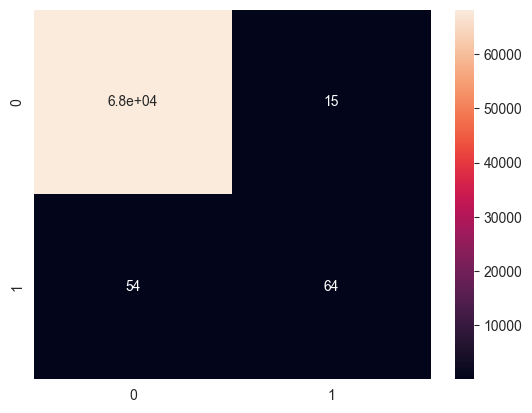

In [23]:
from sklearn.metrics import recall_score, precision_score

best_threshold, best_precision = 0.5, -1

for threshold in np.linspace(0.001, 0.999, 999):
    results = np.array(validate(model, X_test_t, threshold=threshold)).astype(np.int64)
    rec = precision_score(y_test_t, results)
    if rec > best_precision:
        best_precision, best_threshold = rec, threshold

print(f"Best threshold (by precision): {best_threshold:.4f}, precision={best_precision:.4f}, recall={recall_score(y_test_t, results)}")
results = validate(model, X_test_t, best_threshold)
cm = confusion_matrix(y_test_t, results)
sns.heatmap(cm, annot=True)

when tuning the decision threshold, a very high threshold (0.999) drastically increases the model performance. Confirming these results on the validation dataset:

<Axes: >

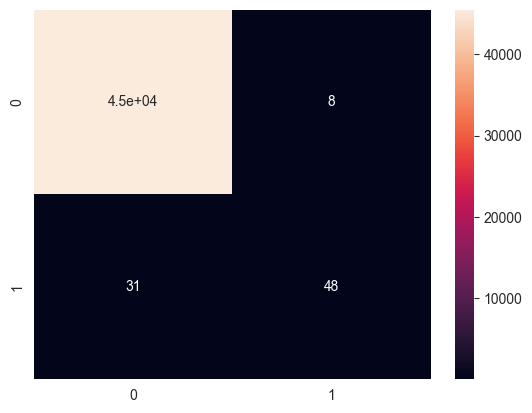

In [24]:
results = validate(model, X_val_t, best_threshold)

cm = confusion_matrix(y_val_t, results)
sns.heatmap(cm, annot=True)

searching for how high optimal threshold is - cautious of overfitting threshold to test data

Best threshold (by precision): 0.9988, precision=0.8148, recall=0.5423728813559322


<Axes: >

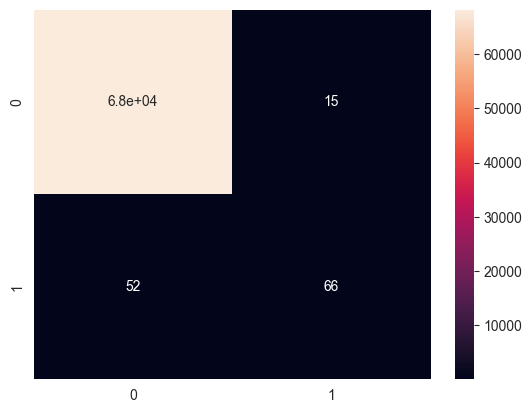

In [25]:
best_threshold, best_precision = 0.981, -1

for threshold in np.linspace(0.981, 0.999, 999):
    results = np.array(validate(model, X_test_t, threshold=threshold)).astype(np.int64)
    rec = precision_score(y_test_t, results)
    if rec > best_precision:
        best_precision, best_threshold = rec, threshold

print(f"Best threshold (by precision): {best_threshold:.4f}, precision={best_precision:.4f}, recall={recall_score(y_test_t, results)}")
results = validate(model, X_test_t, best_threshold)
cm = confusion_matrix(y_test_t, results)
sns.heatmap(cm, annot=True)

threshold of 0.9989 seems to be fairly consistent, when evaluating with test and validate data.

##### Final evaluation with optimised threshold

<Axes: >

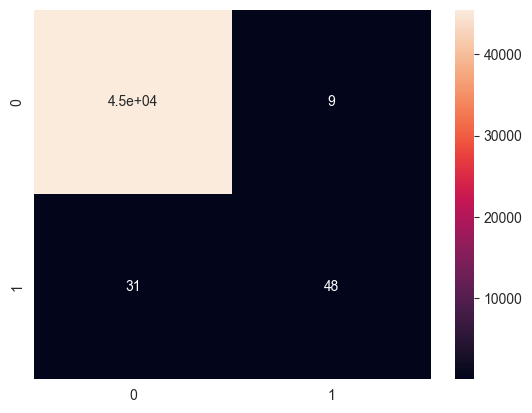

In [26]:
results = validate(model, X_val_t, best_threshold)
cm = confusion_matrix(y_val_t, results)
sns.heatmap(cm, annot=True)

#### Pytorch Model 2

Implementing enhanced architecture and more suitable loss functions / criteria, to evaluate against model 1

In [27]:
import torch
from torch import nn

# implementing dropout, batch normalisation, and a new activation function, and wider hidden layers. Will mean can train on more epochs, with reduced chance of overfitting.
class NeuralNetwork2(nn.Module):
    def __init__(self, p = 0.1):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(30, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(),
            nn.Dropout(p),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        prob = self.linear_relu_stack(x).squeeze(-1)
        return prob

#### Training + evaluating model2

In [28]:
model = NeuralNetwork2().to(device)
print(model)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.BCEWithLogitsLoss()

for epoch in range(1, 51):
    tr_loss = train_loop(model, train_loader, criterion, optimizer)
    print(f"Epoch {epoch} | train_loss={tr_loss:.6f}")
    test_loop(model, test_loader, criterion)

NeuralNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=30, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)
Epoch 1 | train_loss=0.066132
Test: acc=98.62%, loss=0.041440
Epoch 2 | train_loss=0.016419
Test: acc=99.52%, loss=0.017145
Epoch 3 | train_loss=0.010009
Test: acc=99.24%, loss=0.025133
Epoch 4 | train_loss=0.007578
Test: acc=99.80%, loss=0.009442
Epoch 5 | train_loss=0.005970
Test: acc=99.66%, loss=0.013679
Epoch 6 | train_loss=0.005133
Test: acc=99.70%, loss=0.013122
Epoch 7 | train_loss=0.004523
Test: acc=99.80%, loss=0.

Updated threshold search to f1, as was overitting to precision.

* If was deploying model, may be better to prioritise for precision, as would rather have more False Positives (more notifications of potential fraud transactions), as impact of FP < FN.

Best threshold (by precision): 0.9990, precision=0.9857142857142858, recall=0.5847457627118644


<Axes: >

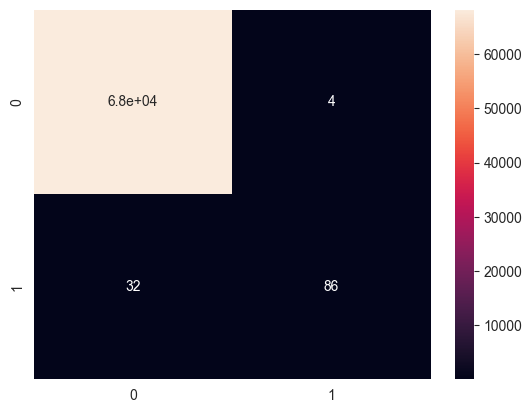

In [29]:
from sklearn.metrics import f1_score
best_threshold, best = 0.9, -1

for threshold in np.linspace(0.9, 1, 1000):
    results = np.array(validate(model, X_test_t, threshold=threshold)).astype(np.int64)
    score = f1_score(y_test_t, results)
    if score > best:
        best, best_threshold = score, threshold

print(f"Best threshold (by f1 score): {best_threshold:.4f}, precision={precision_score(y_test_t, results)}, recall={recall_score(y_test_t, results)}")
results = validate(model, X_test_t, best_threshold)
cm = confusion_matrix(y_test_t, results)
sns.heatmap(cm, annot=True)

##### Final Evaluation

F1 score: 0.8888888888888888


<Axes: >

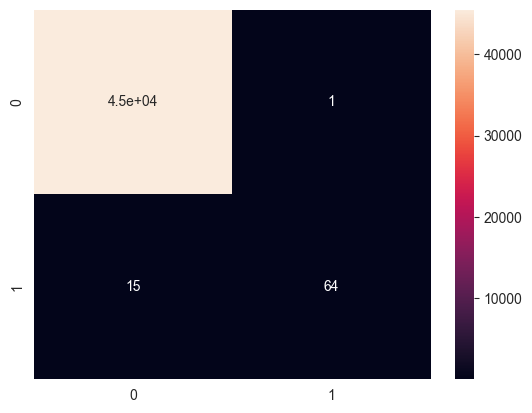

In [30]:
results = validate(model, X_val_t, best_threshold)
print(f"F1 score: {f1_score(y_val_t, results)}")
cm = confusion_matrix(y_val_t, results)
sns.heatmap(cm, annot=True)

#### Comparison to other models
Using autogluon to compare model performance to a variety of out the box models.



In [31]:
import pandas as pd

label = "Class"
train_df = pd.DataFrame(X_train_scaled)
train_df[label] = ytrain

val_df = pd.DataFrame(X_val_scaled)
val_df[label] = yvalidate

test_df = pd.DataFrame(X_test_scaled)
test_df[label] = ytest

In [32]:
from autogluon.tabular import TabularPredictor
save_path = "AutogluonModels"

predictor = TabularPredictor(label=label, eval_metric='f1', positive_class=1, path=save_path)
predictor = predictor.fit(train_data=pd.concat([train_df, test_df]), presets='best_quality', calibrate_decision_threshold='auto', time_limit=600)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.1.0: Mon Oct 20 19:26:04 PDT 2025; root:xnu-12377.41.6~2/RELEASE_ARM64_T8122
CPU Count:          8
Pytorch Version:    2.9.1
CUDA Version:       CUDA is not available
GPU Count:          WARNING: Exception was raised when calculating GPU count (AssertionError)
Memory Avail:       4.90 GB / 16.00 GB (30.6%)
Disk Space Avail:   297.26 GB / 460.43 GB (64.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the

In [33]:
lb = predictor.leaderboard(val_df, silent=True)
lb.head()


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesGini_BAG_L1,0.911565,0.848728,f1,0.224705,3.431879,7.689644,0.224705,3.431879,7.689644,1,True,4
1,WeightedEnsemble_L2,0.905405,0.863937,f1,0.512447,6.045401,264.670254,0.001896,0.011805,0.841531,2,True,5
2,CatBoost_BAG_L2,0.905405,0.868318,f1,0.786229,9.528095,293.391837,0.050973,0.062620,21.873470,2,True,8
3,RandomForestEntr_BAG_L2,0.905405,0.871728,f1,0.795840,10.500182,292.063953,0.060584,1.034707,20.545586,2,True,7
4,WeightedEnsemble_L3,0.905405,0.872536,f1,0.797862,10.512200,293.551003,0.002022,0.012018,1.487050,3,True,9


Neural network had a final val f1 score of 0.8888888888888888, outperforming all autogluon models by this evaluation criteria.